In [26]:
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

In [6]:
df= pd.read_csv('gdp.csv')

In [8]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [10]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

## Check Description of Each column


In [14]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [16]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [18]:
df['Year'].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [20]:
df['Year'].mean()

1991.2652298600851

In [22]:
df['Year'].max()

2016

## Analysing Arab World

In [32]:
df_pr=df[df['Country Name']=='Arab World']

<Axes: xlabel='Year'>

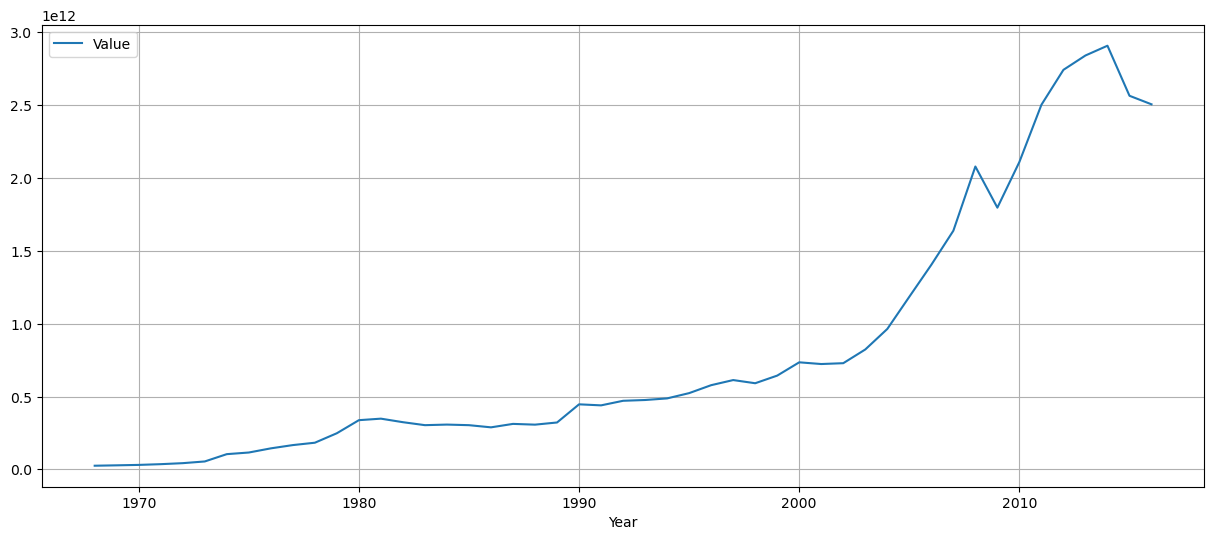

In [46]:
df_pr.plot(kind='line',x='Year',y='Value'
          ,figsize=(15,6),grid=True,legend=True)

In [48]:
df_pr

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
5,Arab World,ARB,1973,5.501839e+10
6,Arab World,ARB,1974,1.051458e+11
7,Arab World,ARB,1975,1.163370e+11
8,Arab World,ARB,1976,1.448462e+11
9,Arab World,ARB,1977,1.673083e+11


## Finding GDP growth of every country

In [76]:

final_data=[]
for country_name in df["Country Name"].unique():
    df_pr=df[df['Country Name']=="India"]
    data = df_pr.values
    
    gdp_change = [0]
    
    for i in range(1,len(data)):
    
        prev= data[i-1][3]
        cur=data[i][3]
        gdp_change.append(round(((cur-prev) / prev)*100,2))
    df_pr=df_pr.assign(GDP=gdp_change)
    final_data.append(df_pr)

In [78]:
df=pd.concat(final_data,axis=0)

In [80]:
df

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
...,...,...,...,...,...
6126,India,IND,2012,1.827638e+12,0.25
6127,India,IND,2013,1.856722e+12,1.59
6128,India,IND,2014,2.035393e+12,9.62
6129,India,IND,2015,2.089865e+12,2.68


## Plotly

In [88]:
import plotly.express as px
import plotly.offline as pyo

In [90]:
df.head()

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64


In [116]:
df_pr=df[df['Country Name']=="India"]

In [124]:
fig= px.line(df_pr, x = "Year", y ='Value', title = "World GDP Analysis")

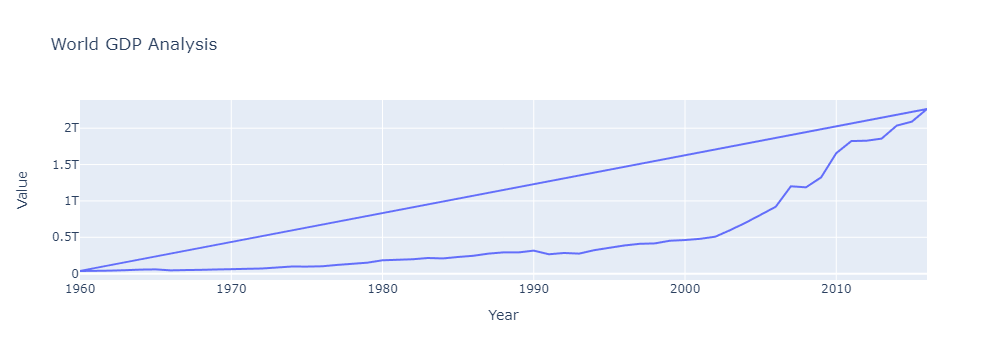

In [126]:
fig

## GDP of Each Country

In [12]:
df= pd.read_csv('gdp.csv')


In [14]:
df['Country Name'].nunique()


256

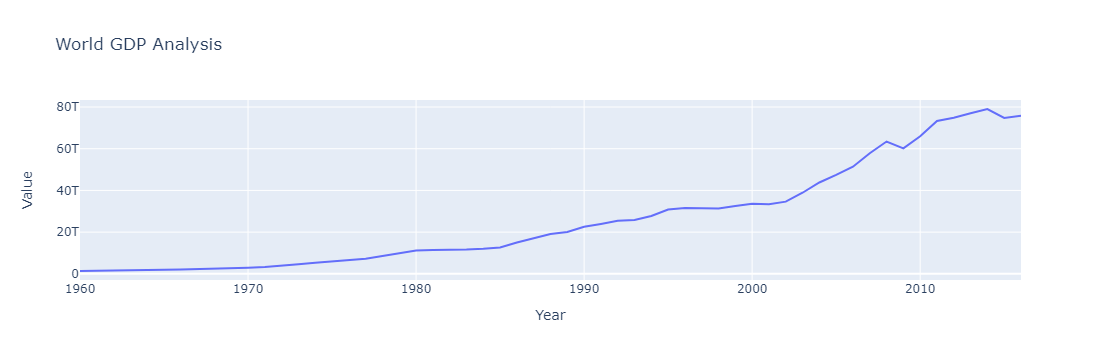

In [60]:
df_pr=df[df['Country Name']=='World']
fig=px.line(df_pr,x='Year', y='Value', title= 'World GDP Analysis')
fig

In [16]:
import os

In [28]:
os.mkdir('GDP')
for country_name in df['Country Name'].unique():
    df_pr=df[df['Country Name']==country_name]
    fig=px.line(df_pr,x='Year', y='Value', title= country_name + 'GDP Analysis')
    pyo.plot(fig,filename='GDP/'+country_name+'.html',auto_open=False)
    break;

## GDP comparison between Specific Countries

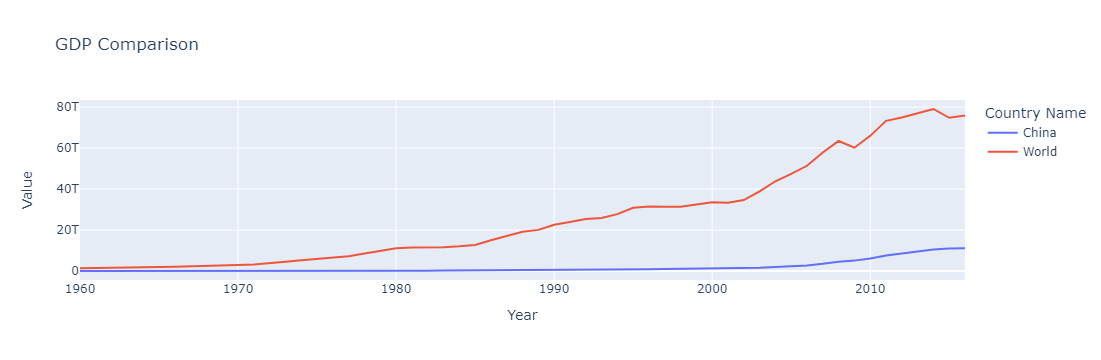

In [45]:
c1= df[df['Country Name']=='China']
c2= df[df['Country Name']=='World']

df_pr= pd.concat([c1,c2],axis=0)

fig= px.line(df_pr, x= 'Year', y='Value', title= 'GDP Comparison', color='Country Name')
pyo.plot(fig,filename = 'Chiwd.html')
fig

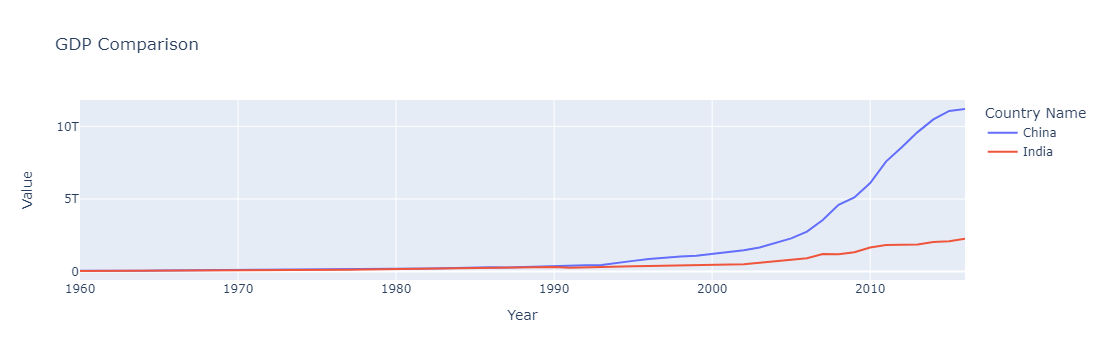

In [47]:
c1= df[df['Country Name']=='China']
c2= df[df['Country Name']=='India']

df_pr= pd.concat([c1,c2],axis=0)

fig= px.line(df_pr, x= 'Year', y='Value', title= 'GDP Comparison', color='Country Name')
pyo.plot(fig,filename = 'IndiaChina.html')
fig

In [49]:
df_pr

,Country Name,Country Code,Year,Value
4046,China,CHN,1960,5.971647e+10
4047,China,CHN,1961,5.005687e+10
4048,China,CHN,1962,4.720936e+10
4049,China,CHN,1963,5.070680e+10
4050,China,CHN,1964,5.970834e+10
...,...,...,...,...
6126,India,IND,2012,1.827638e+12
6127,India,IND,2013,1.856722e+12
6128,India,IND,2014,2.035393e+12
6129,India,IND,2015,2.089865e+12
